# Глава 1

## Задание 1.2.

С сайта https://freesound.org/ был скачан и распечатан образец звука.

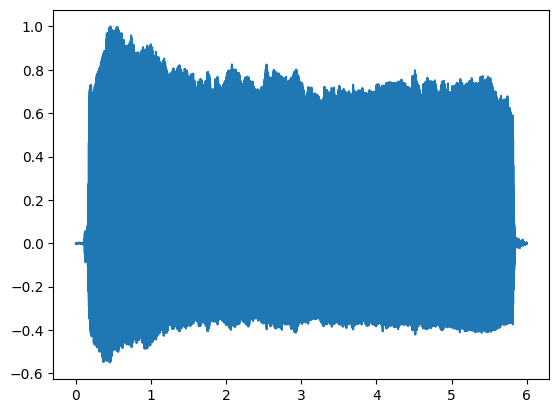

In [4]:
from thinkdsp import read_wave
filename = "608181__jr_gomez__fasax_2.wav"
wave = read_wave(filename)
wave.plot()

Далее, выделен сегмент с приблизительно постоянной частотой.

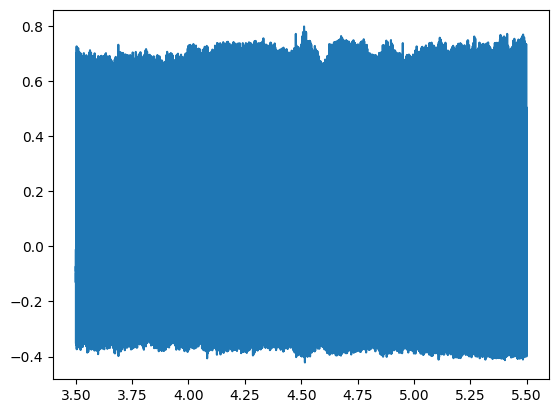

In [11]:
start = 3.5
length = 2
segment = wave.segment(start, length)
segment.plot()

Для разложения в спектр, т.е. представления сигнала как суммы синусоид с разными частотами, используется функция make_spectrum(), вычисляющая БПФ. С помощью plot() выведем график модулей значений БПФ.

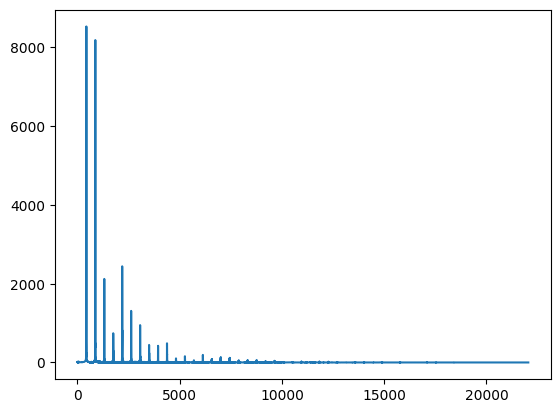

In [12]:
spectr = segment.make_spectrum()
spectr.plot()

Анализируя график, было принято решение оставить значения до 5 КГц для удобства анализа.

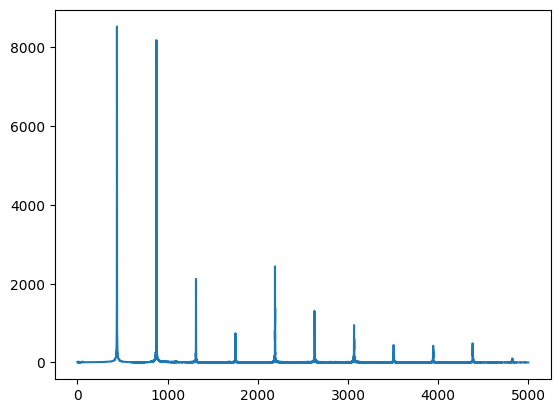

In [13]:
spectr.plot(high=5000)

Из графика видно, что пики находятся на примерно равном расстоянии друг от друга, что соответствует гармоническому спектру периодического сигнала.

Для определения основной гармоники необходидимо определить частоту первого пика.

In [ ]:
list(filter(lambda x: x[1] < 700, spectrum.peaks()))[0]

(np.float64(12404.382651369848), np.float64(438.40000000000003))

Частота первого пика 438.4 Гц — это основная частота (F0) звукового сигнала. Она означает, что звук соответствует ноте «Ля» (A4) в темперированном строе. Сигнал чуть ниже эталонного (разница ~1.6 Гц) => возможно, погрешность записи или неидеальная настройка инструмента.
Остальные пики кратны этой частоте, что подтверждает периодичность сигнала.

Writing lp.wav


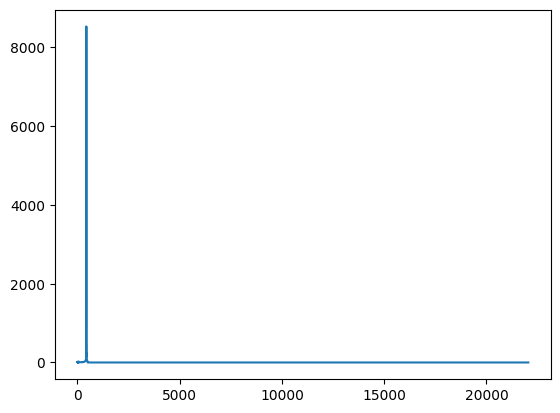

In [15]:
lp_spec = spectr
lp_spec.low_pass(500)
lp_spec.plot()
lp_wave = lp_spec.make_wave()
lp_wave.normalize()
lp_wave.apodize()
lp_wave.write("lp.wav")

Если выделить только основной тон 438.4 Гц, полностью отсекая все гармоники и шумы, получится чистый синусоидальный сигнал на 438.4 Гц — как звук генератора частот или камертона, к тому же без тембра, т.е. звук получается «пустым», без характерной окраски.

Writing hp.wav


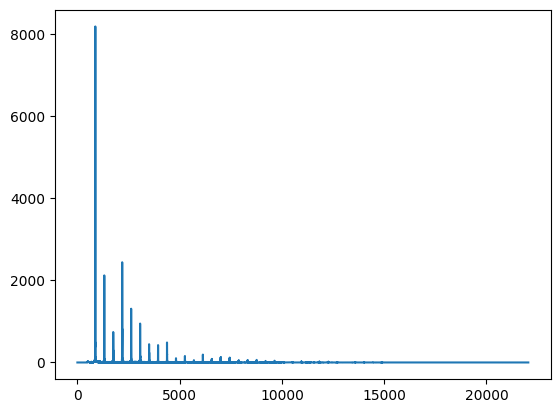

In [20]:
spectr = segment.make_spectrum()
hp_spec = spectr
hp_spec.high_pass(500)
hp_spec.plot()
hp_wave = hp_spec.make_wave()
hp_wave.normalize()
hp_wave.apodize()
hp_wave.write("hp.wav")

Если убрать основной тон (438.4 Гц), но оставить гармоники, то пропадает ощущение высоты тона, звук воспринимается как тот же «Ля», но на октаву выше и с эффектом «отсутствующей основы». К тому же, тембр становится неестественным.

Writing bs.wav


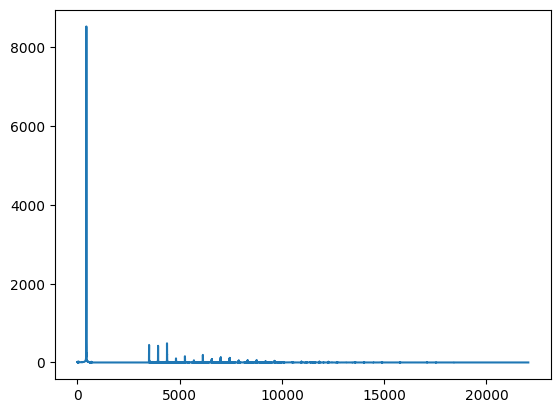

In [33]:
spectr = segment.make_spectrum()
bs_spec = spectr
bs_spec.band_stop(700, 3500)
bs_spec.plot()
bs_wave = bs_spec.make_wave()
bs_wave.normalize()
bs_wave.apodize()
bs_wave.write("bs.wav")

При фильтрации самых громких гармоник полосовым фильтром, результат будет практически идентичен чистому основному тону без гармоник, за исключением небольшого "дребезга."

## Задание 1.3.

Создадим объекты SinSignal с частотой 880 Гц и амплитудой 1 и CosSignal с частотой 440 Гц и амплитудой 0.5. Далее просуммируем и выведем получившийся сигнал.

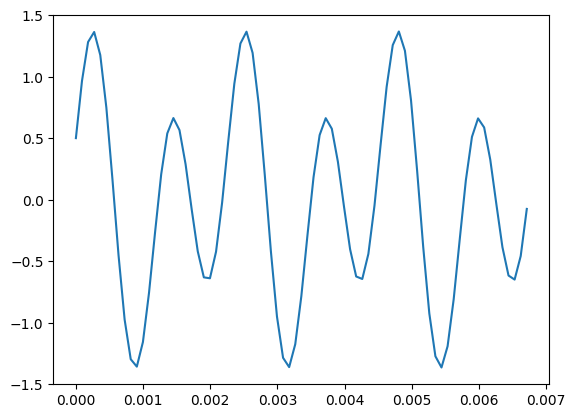

In [34]:
from thinkdsp import SinSignal, CosSignal
sig_sin = SinSignal(880, 1)
sig_cos = CosSignal(440, 0.5)
sig = sig_sin + sig_cos
sig.plot()

Конвертируем получившийся сигнал в wave.

In [35]:
sig_wave = sig.make_wave(1)
sig_wave.normalize()
sig_wave.write("signal.wav")

Writing signal.wav


При прослушивании сигнала, сумма синуса и косинуса даст сигнал, звучащий как две ноты одновременно: высокий тон 880 Гц, низкий тон 440 Гц.  
Звук гармоничный, без биений (т.к. частоты кратны).  


In [36]:
sig_wave.make_audio()

При разложении в спектр, можно заметить 2 пика на частотах созданных объектов SinSignal и CosSignal.

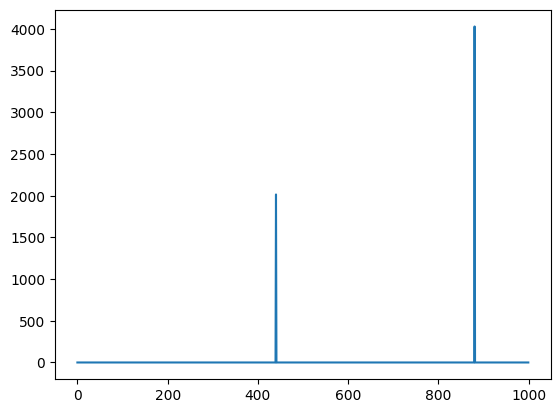

In [38]:
sig_spectrum = sig_wave.make_spectrum()
sig_spectrum.plot(high = 1000)

Сумма сигналов с некратными частотами (440 Гц, 880 Гц, 330.55 Гц, 723 Гц) дает более сложный, негармоничный звук.Появились биения (пульсации) из-за разницы частот. Звук стал неустойчивым, без чёткой высоты тона.

Так же можно заметить, что нет чёткого повторения формы из-за иррациональных соотношений частот и хаотичные всплески амплитуды от наложения волн.

Writing signal2.wav


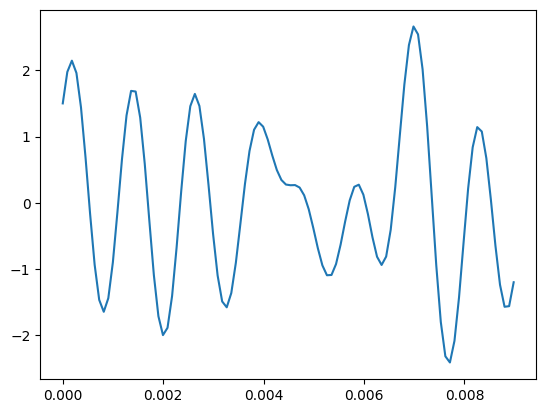

In [39]:
sig_2 = sig + SinSignal(330.55, 0.5) + CosSignal(723, 1)
sig_2.plot()
sig_wave_2 = sig_2.make_wave(1)
sig_wave_2.normalize()
sig_wave_2.write("signal2.wav")

In [ ]:
sig_wave_2.make_audio()

На спектре можно заметить 4 отдельных пика без гармонической связи.

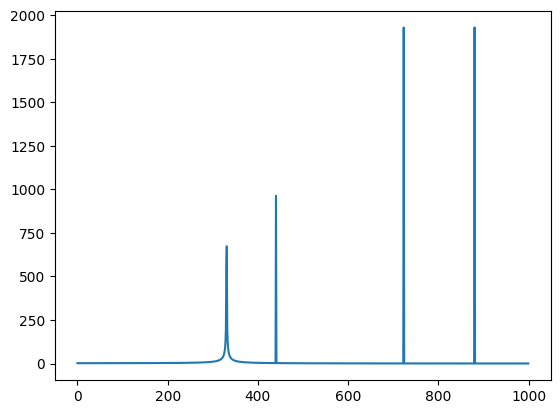

In [ ]:
sig_spectrum_2 = sig_wave_2.make_spectrum()
sig_spectrum_2.plot(high = 1000)

## Задание 1.4.

Функция stretch(wave, factor) изменяет скорость и высоту звука одновременно: происходит изменение временной шкалы (ts * factor), сохранение исходной частоты дискретизации.

Ускорим сигнал из предыдущего задания.

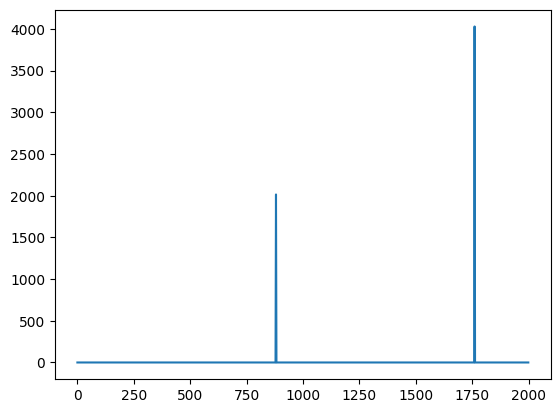

In [57]:
from thinkdsp import Wave
def stretch(wave: Wave, factor:float):
    return Wave(wave.ys, wave.ts * factor, wave.framerate / factor)

sig_wave_stretched = stretch(sig_wave, 0.5)
spectrum_stretched = sig_wave_stretched.make_spectrum()
spectrum_stretched.plot(high = 2000)

Пики сигнала приходятся на частоты 880 Гц и 1760 Гц, что показывает ускорение в 2 раза. Звук стал выше, а аудиодорожка стала равной 0.5 секунд.
При замедлении сигнала наблюдалось бы изменение частот на 220 Гц и 440 Гц, звук был бы ниже, а аудиодорожка стала бы 2 секунды.

In [56]:
sig_wave_stretched.write("signal_05.wav")

Writing signal_05.wav


In [58]:
list(filter(lambda x: x[1] < 2000, spectrum_stretched.peaks()))[0:2]

[(np.float64(4029.8781323043995), np.float64(1760.0)),
 (np.float64(2014.939066152202), np.float64(880.0))]